# EDA


### Imports

In [1]:
import json
from operator import itemgetter

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pycocotools.coco import COCO
from ultralytics.yolo.utils.downloads import download
from pathlib import Path

### Setting up folders

In [2]:
dsRoot = Path('datasets/coco-pose/')  # Setting up root folder for the dataset (ds)
dsImages = dsRoot / 'images/val2017'  # Folder for the val images in the ds
dsInstances = dsRoot / 'annotations/instances_val2017.json'  # Annotation file (I'm using the val file because it is similar to the training one but smaller and easier to load. Ultralytics coco-pose will not download the training annotation file.)
dsKeypoints = dsRoot / 'annotations/person_keypoints_val2017.json'  # Keypoint's file

### Downloading the dataset if none existing
I'm using ultralytics to download the dataset, but you could do it from https://cocodataset.org/#download as well.

In [3]:
# Download labels
url = 'https://github.com/ultralytics/yolov5/releases/download/v1.0/'
urls = [url + 'coco2017labels-pose.zip']  # labels
download(urls, dir=dsRoot.parent)
# Download data
urls = ['http://images.cocodataset.org/zips/train2017.zip',  # 19G, 118k images
        'http://images.cocodataset.org/zips/val2017.zip',  # 1G, 5k images
        'http://images.cocodataset.org/zips/test2017.zip']  # 7G, 41k images (optional)
download(urls, dir=dsRoot /'images', threads=3)

Unzipping datasets\coco2017labels-pose.zip to datasets...
Skipping datasets\coco2017labels-pose.zip unzip (already unzipped)
Unzipping datasets\coco-pose\images\train2017.zip to datasets\coco-pose\images...
Unzipping datasets\coco-pose\images\val2017.zip to datasets\coco-pose\images...
Unzipping datasets\coco-pose\images\test2017.zip to datasets\coco-pose\images...
Skipping datasets\coco-pose\images\val2017.zip unzip (already unzipped)
Skipping datasets\coco-pose\images\test2017.zip unzip (already unzipped)
Skipping datasets\coco-pose\images\train2017.zip unzip (already unzipped)


### Loading the dataset

In [4]:
# Loading the annotation fil into MS COCO helper class for reading and visualizing
coco = COCO(dsInstances)

# Reading the json file
with open(dsInstances, 'r') as f:
    annots = json.load(f)
annots.keys()

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [5]:
with open(dsKeypoints, 'r') as f:
    key_annots = json.load(f)
key_annots.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

Info about the train dataset

In [6]:
df_categories = pd.DataFrame(annots['categories'])

# print(pd.DataFrame(annots['licenses'])) # Contains information about the diffrent licenses in the dataset.
# print(annots['images']) # Contains information about all the images.
# print(annots['annotations']) # Contains information about all the annotations.

print(annots['info'], '\n')
print(df_categories.info(), '\n')
print(df_categories['supercategory'].unique(), '\n')
print(df_categories['name'].unique(), '\n')

{'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'} 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   supercategory  80 non-null     object
 1   id             80 non-null     int64 
 2   name           80 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.0+ KB
None 

['person' 'vehicle' 'outdoor' 'animal' 'accessory' 'sports' 'kitchen' 'food' 'furniture' 'electronic' 'appliance' 'indoor'] 

['person' 'bicycle' 'car' 'motorcycle' 'airplane' 'bus' 'train' 'truck' 'boat' 'traffic light' 'fire hydrant' 'stop sign' 'parking meter' 'bench' 'bird' 'cat' 'dog' 'horse' 'sheep' 'cow' 'elephant' 'bear' 'zebra' 'giraffe' 'backpack' 'umbrella' 'handbag' 'tie' 'suitcase' 'frisbee' 'skis' 'snowboard' 'sports ball'
 'kite' 'baseball

In [7]:
df_key_categories = pd.DataFrame(key_annots['categories'])

print(df_key_categories.info(), '\n')
print(df_key_categories['keypoints'].tolist(), '\n')
print(df_key_categories['skeleton'].tolist(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   supercategory  1 non-null      object
 1   id             1 non-null      int64 
 2   name           1 non-null      object
 3   keypoints      1 non-null      object
 4   skeleton       1 non-null      object
dtypes: int64(1), object(4)
memory usage: 172.0+ bytes
None 

[['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle']] 

[[[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12], [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]]] 



In [8]:
name_dataset = annots['info']['description']  # get the dataset name
nr_images = len(annots['images'])  # get number of images in the dataset
nr_annots = len(annots['annotations'])  # get number of annotations in the dataset
nr_categories = len(annots['categories'])  # get number of categories in the dataset

# height, width
heights = [x['height'] for x in annots['images']]
widths = [x['width'] for x in annots['images']]

print('Dataset Name: ', name_dataset)
print('Number of images: ', nr_images)
print('Number of annotations: ', nr_annots)
print('Number of categories: ', nr_categories)
print(f'Pixel Heights\nMax: {max(heights)} Min: {min(heights)} Avg: {int(sum(heights) / len(heights))}')
print(f'Pixel Widths\nMax: {max(widths)} Min: {min(widths)} Avg: {int(sum(widths) / len(widths))}')

Dataset Name:  COCO 2017 Dataset
Number of images:  5000
Number of annotations:  36781
Number of categories:  80
Pixel Heights
Max: 640 Min: 145 Avg: 483
Pixel Widths
Max: 640 Min: 200 Avg: 573


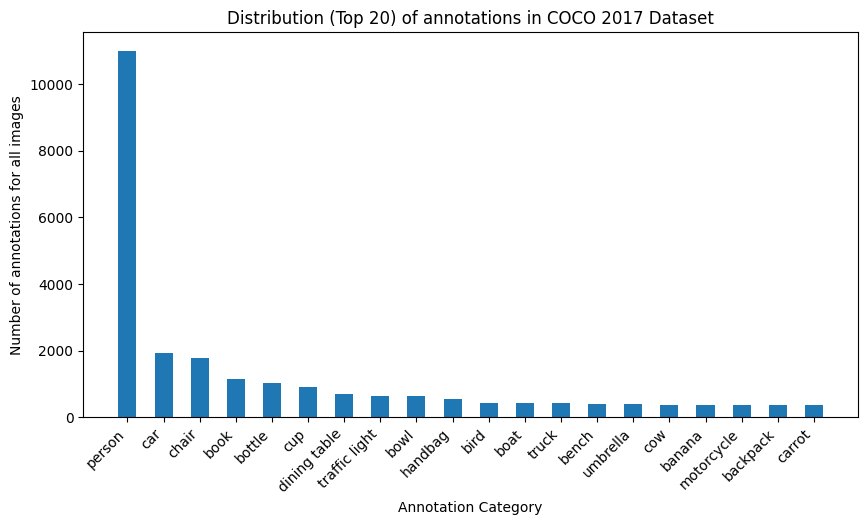

In [9]:
# Loading category information
categories = coco.loadCats(coco.getCatIds())

# Count annotations per category
annot_per_cat = {cat['id']: 0 for cat in categories}

for annot in annots['annotations']:
    cat_id = annot['category_id']
    if cat_id in annot_per_cat:
        annot_per_cat[cat_id] += 1

# Sort categories by annotation count
sorted_annot_per_cat = sorted(annot_per_cat.items(), key=itemgetter(1), reverse=True)

# Select top 20
top = min(len(sorted_annot_per_cat), 20)
sorted_annot_per_cat = sorted_annot_per_cat[:top]

# Extract x and y for plotting
x = []
y = []
for cat_id, count in sorted_annot_per_cat:
    category = next((cat for cat in categories if cat['id'] == cat_id), None)
    if category:
        x.append(category['name'])
        y.append(count)

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.bar(range(top), y, width=0.5, tick_label=x)
plt.xlabel('Annotation Category')
plt.ylabel('Number of annotations for all images')
plt.title(f'Distribution (Top {top}) of annotations in {name_dataset}')
plt.xticks(rotation=45, ha='right')
plt.show()

We can clearly see that the dataset is bias towards pictures representing persons.
Hopefully this will not be a problem in my case because I want to be able to detect persons to do my pose estimatian
and do not really have any use of other objects.

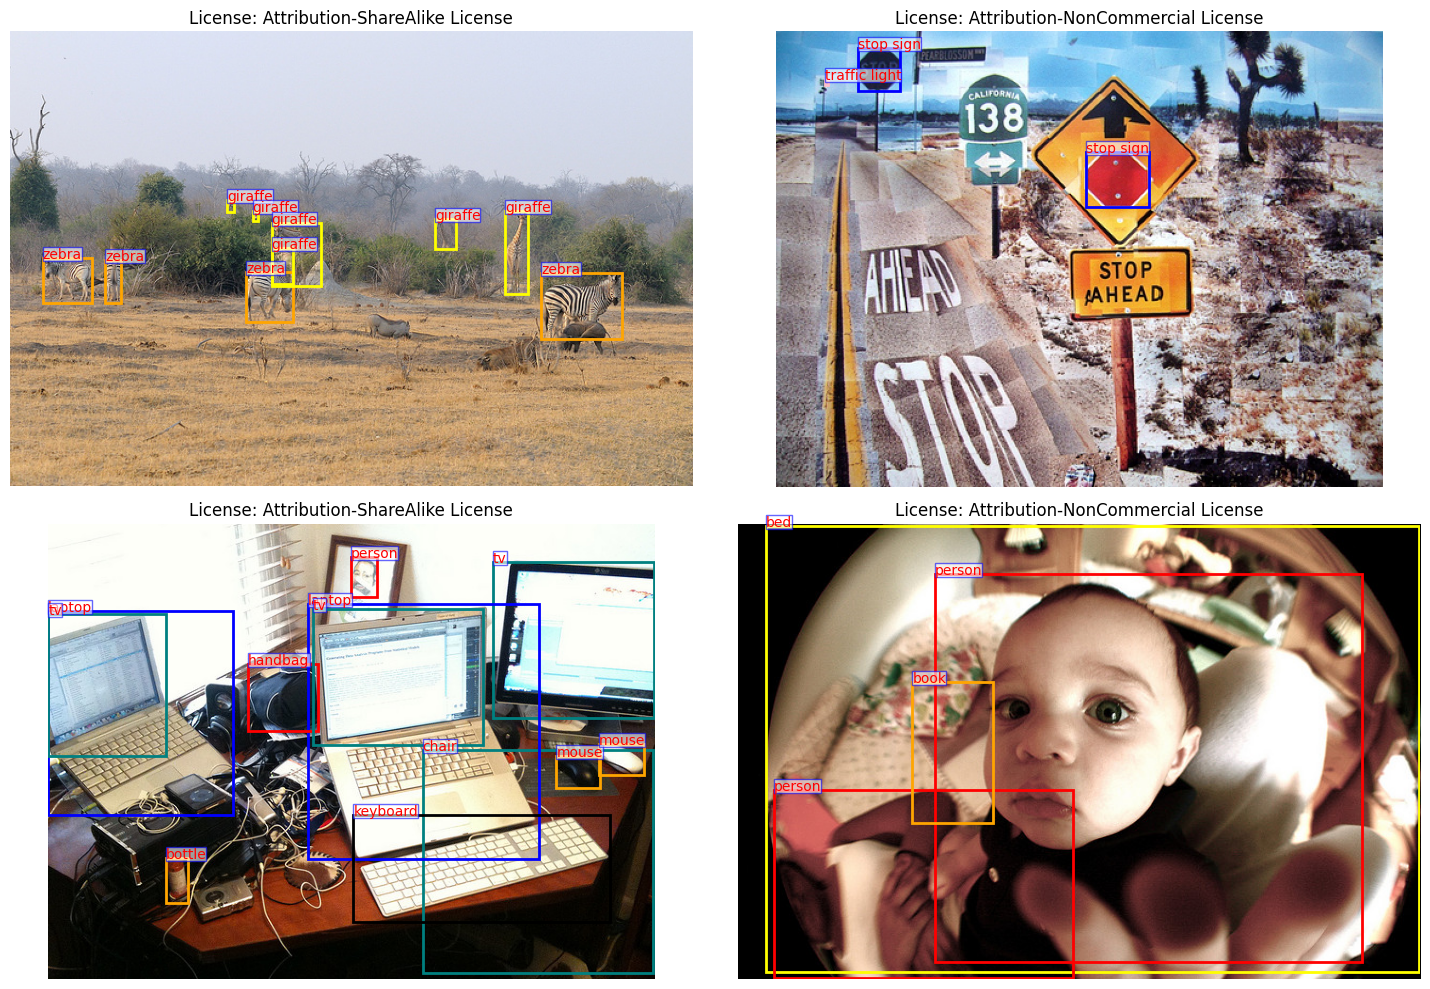

In [10]:
# Most of the code below from:
# https://machinelearningspace.com/coco-dataset-a-step-by-step-guide-to-loading-and-visualizing/
# made changes to make it work with MS COCO helper.
# Changed the values that can't be fetched using MS COCO helper and changed image visualizer.

color_list = ["pink", "red", "teal", "blue", "orange", "yellow", "black", "magenta", "green", "aqua"] * 10
num_imgs_to_disp = 4
total_images = len(coco.getImgIds())  # total number of images
sel_im_idxs = np.random.permutation(total_images)[:num_imgs_to_disp]
img_ids = coco.getImgIds()
selected_img_ids = [img_ids[i] for i in sel_im_idxs]
ann_ids = coco.getAnnIds(selected_img_ids)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax = ax.ravel()
for i, im in enumerate(selected_img_ids):
    image = mpimg.imread(f"{dsImages}/{str(im).zfill(12)}.jpg")
    ann_ids = coco.getAnnIds(im)
    annotations = coco.loadAnns(ann_ids)
    for ann in annotations:
        bbox = ann['bbox']
        x, y, w, h = [int(b) for b in bbox]
        class_id = ann["category_id"]
        class_name = coco.loadCats(class_id)[0]["name"]
        ImgLicense = annots['licenses'][annots['images'][i]['license']]['name']
        color_ = color_list[class_id]
        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=color_, facecolor='none')
        t_box = ax[i].text(x, y, class_name, color='red', fontsize=10)
        t_box.set_bbox(dict(boxstyle='square, pad=0', facecolor='white', alpha=0.6, edgecolor='blue'))
        ax[i].add_patch(rect)

    ax[i].axis('off')
    ax[i].imshow(image)
    ax[i].set_title(f"License: {ImgLicense}")
plt.tight_layout()
plt.show()